https://towardsdatascience.com/a-step-by-step-tutorial-using-k-means-to-extract-image-color-themes-43e04808b2be

In [4]:
from scipy.cluster.vq import kmeans
import pandas as pd
from scipy.cluster.vq import whiten
from matplotlib import pyplot as plt
from matplotlib import image as img
import matplotlib.patches as mpatches
import numpy as np

In [11]:
# Load image
image = img.imread('/home/simon/PycharmProjects/pythonProject/image.jpeg')
image.shape

(466, 700, 3)

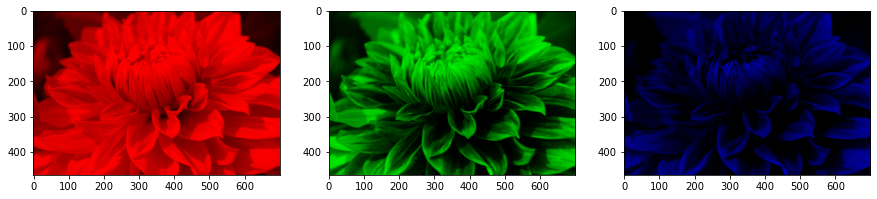

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for c, ax in zip(range(3), ax):
    # initiate a zero matrix with dtype as unit8 as the R,G,B values are between 0 to 255
    channel = np.zeros(image.shape, dtype="uint8")

    # only allow one color at each time
    channel[:, :, c] = image[:, :, c]

    # display each channel
    ax.imshow(channel)

In [13]:
df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())
df.head()

r   g   b
0  67  54  10
1  66  53   9
2  64  51   7
3  62  49   7
4  59  46   4

In [14]:
df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])
df.head()

r   g   b  r_whiten  g_whiten  b_whiten
0  67  54  10  1.144244  0.812206  0.245148
1  66  53   9  1.127165  0.797165  0.220633
2  64  51   7  1.093009  0.767083  0.171604
3  62  49   7  1.058852  0.737002  0.171604
4  59  46   4  1.007618  0.691879  0.098059

In [134]:
cluster_centers, distortion = kmeans(df[['r_whiten', 'g_whiten', 'b_whiten']], 18)
r_std, g_std, b_std = df[['r', 'g', 'b']].std()
colorsRGB = []
colorsRGB01 = []
for color in cluster_centers:
    sr, sg, sb = color
    colorsRGB.append((int(sr*r_std), int(sg*g_std), int(sb*b_std)))
    colorsRGB01.append(color / 255)
colorsRGBHex = ['#%02x%02x%02x' % (i) for i in colorsRGB]

In [135]:
colors = []
for val in colorsRGB01:
    colors.append(list(val))
for val in colors:
    val.append(1.0)

    #f1c75f #bf8236 #f7d189 #6b713f #eebf32 #9e0e04 #2d1401 #d3931c #333709 #7a0b02 #b95821 #eb7c5c #e35840 #9c3b12 #d69e4a #bb2111 #d53726 #efa176 

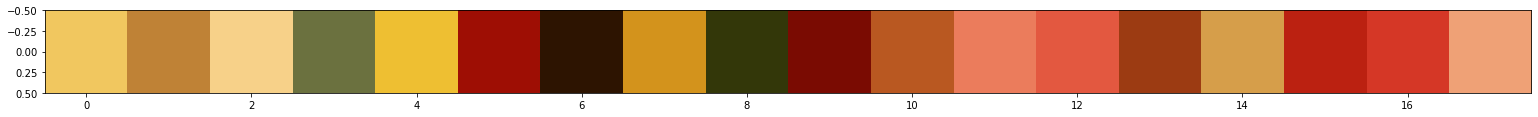

In [136]:
plt.figure(figsize = (1.48 * len(colors),10))
plt.imshow([colorsRGB])

print('   ', end = '')
for i in colorsRGBHex:
    print(i, end = ' ')